In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format


In [ ]:
#Dataset loading
df=pd.read_csv('/content/drive/MyDrive/Final assignment/CO2 Emissions.csv')
df.head(10)


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,Acura,ILX,Compact,2.00,4,AS5,Z,9.90,6.70,8.50,33,196
1,Acura,ILX,Compact,2.40,4,M6,Z,11.20,7.70,9.60,29,221
2,Acura,ILX HYBRID,Compact,1.50,4,AV7,Z,6.00,5.80,5.90,48,136
3,Acura,MDX 4WD,Suv - Small,3.50,6,AS6,Z,12.70,9.10,11.10,25,255
4,Acura,RDX AWD,Suv - Small,3.50,6,AS6,Z,12.10,8.70,10.60,27,244
5,Acura,RLX,Mid-Size,3.50,6,AS6,Z,11.90,7.70,10.00,28,230
6,Acura,TL,Mid-Size,3.50,6,AS6,Z,11.80,8.10,10.10,28,232
7,Acura,TL AWD,Mid-Size,3.70,6,AS6,Z,12.80,9.00,11.10,25,255
8,Acura,TL AWD,Mid-Size,3.70,6,M6,Z,13.40,9.50,11.60,24,267
9,Acura,TSX,Compact,2.40,4,AS5,Z,10.60,7.50,9.20,31,212


In [ ]:
df.tail(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
5946,Volvo,S90 T6 AWD,Mid-Size,2.00,4,AS8,Z,11.30,7.50,9.60,29,223
5947,Volvo,V60 T5,Station Wagon - Small,2.00,4,AS8,Z,10.50,7.10,8.90,32,208
5948,Volvo,V60 T6 AWD,Station Wagon - Small,2.00,4,AS8,Z,11.00,7.40,9.40,30,219
5949,Volvo,V60 CC T5 AWD,Station Wagon - Small,2.00,4,AS8,Z,10.80,7.70,9.40,30,220
5950,Volvo,XC40 T4 AWD,Suv - Small,2.00,4,AS8,X,10.20,7.50,9.00,31,210
5951,Volvo,XC40 T5 AWD,Suv - Small,2.00,4,AS8,Z,10.70,7.70,9.40,30,219
5952,Volvo,XC60 T5 AWD,Suv - Small,2.00,4,AS8,Z,11.20,8.30,9.90,29,232
5953,Volvo,XC60 T6 AWD,Suv - Small,2.00,4,AS8,Z,11.70,8.60,10.30,27,240
5954,Volvo,XC90 T5 AWD,Suv - Standard,2.00,4,AS8,Z,11.20,8.30,9.90,29,232
5955,Volvo,XC90 T6 AWD,Suv - Standard,2.00,4,AS8,Z,12.20,8.70,10.70,26,248


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956 entries, 0 to 5955
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              5956 non-null   object 
 1   Model                             5956 non-null   object 
 2   Vehicle Class                     5956 non-null   object 
 3   Engine Size(L)                    5956 non-null   float64
 4   Cylinders                         5956 non-null   int64  
 5   Transmission                      5956 non-null   object 
 6   Fuel Type                         5956 non-null   object 
 7   Fuel Consumption City (L/100 km)  5956 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   5956 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  5956 non-null   float64
 10  Fuel Consumption Comb (mpg)       5956 non-null   int64  
 11  CO2 Emissions(g/km)               5956 non-null   int64  
dtypes: flo

In [ ]:
#For number of rows and columns
df.shape

(5956, 12)

# Exploratory Data Analysis (EDA)

In [ ]:
#Summary Statistics
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,5956.00,5956.00,5956.00,5956.00,5956.00,5956.00,5956.00
mean,3.17,5.63,12.65,9.09,11.05,27.33,251.63
std,1.37,1.85,3.56,2.29,2.96,7.18,59.27
min,0.90,3.00,4.20,4.00,4.10,11.00,96.00
25%,2.00,4.00,10.10,7.50,8.90,22.00,208.00
50%,3.00,6.00,12.10,8.70,10.60,27.00,246.00
75%,3.80,6.00,14.70,10.30,12.70,32.00,290.00
max,8.40,16.00,30.60,20.60,26.10,69.00,522.00


In [ ]:
#Check for missing values
df.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


In [ ]:
#columns with unique values
object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique())
    print('\n')

Unique values in 'Make':
['Acura' 'Alfa Romeo' 'Aston Martin' 'Audi' 'Bentley' 'Bmw' 'Buick'
 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge' 'Fiat' 'Ford' 'Gmc' 'Honda'
 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Kia' 'Lamborghini' 'Land Rover'
 'Lexus' 'Lincoln' 'Maserati' 'Mazda' 'Mercedes-Benz' 'Mini' 'Mitsubishi'
 'Nissan' 'Porsche' 'Ram' 'Rolls-Royce' 'Scion' 'Smart' 'Srt' 'Subaru'
 'Toyota' 'Volkswagen' 'Volvo' 'Genesis' 'Bugatti']


Unique values in 'Model':
['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Atlas Cross Sport 4MOTION' 'Passat'
 'XC40 T4 AWD']


Unique values in 'Vehicle Class':
['Compact' 'Suv - Small' 'Mid-Size' 'Two-Seater' 'Minicompact'
 'Subcompact' 'Full-Size' 'Station Wagon - Small' 'Suv - Standard'
 'Van - Cargo' 'Van - Passenger' 'Pickup Truck - Standard' 'Minivan'
 'Special Purpose Vehicle' 'Station Wagon - Mid-Size'
 'Pickup Truck - Small']


Unique values in 'Transmission':
['AS5' 'M6' 'AV7' 'AS6' 'AM6' 'A6' 'AM7' 'AV8' 'AS8' 'A7' 'A8' 'M7' 'A4'
 'M5' 'AV' 'A5' 'AS7' 'A9' 'AS9

**Data Visualization**

In [ ]:
#transform all data into numerical data
df_dummies=pd.get_dummies(df)
print(df_dummies.head())


   Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0            2.00          4                              9.90   
1            2.40          4                             11.20   
2            1.50          4                              6.00   
3            3.50          6                             12.70   
4            3.50          6                             12.10   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                             6.70                              8.50   
1                             7.70                              9.60   
2                             5.80                              5.90   
3                             9.10                             11.10   
4                             8.70                             10.60   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Make_Acura  \
0                           33                  196        True   
1                           29      

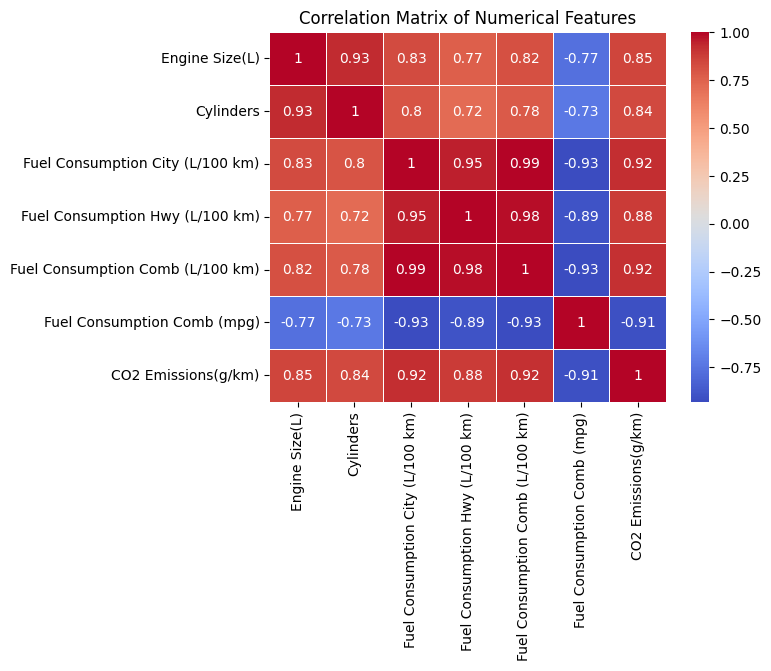

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

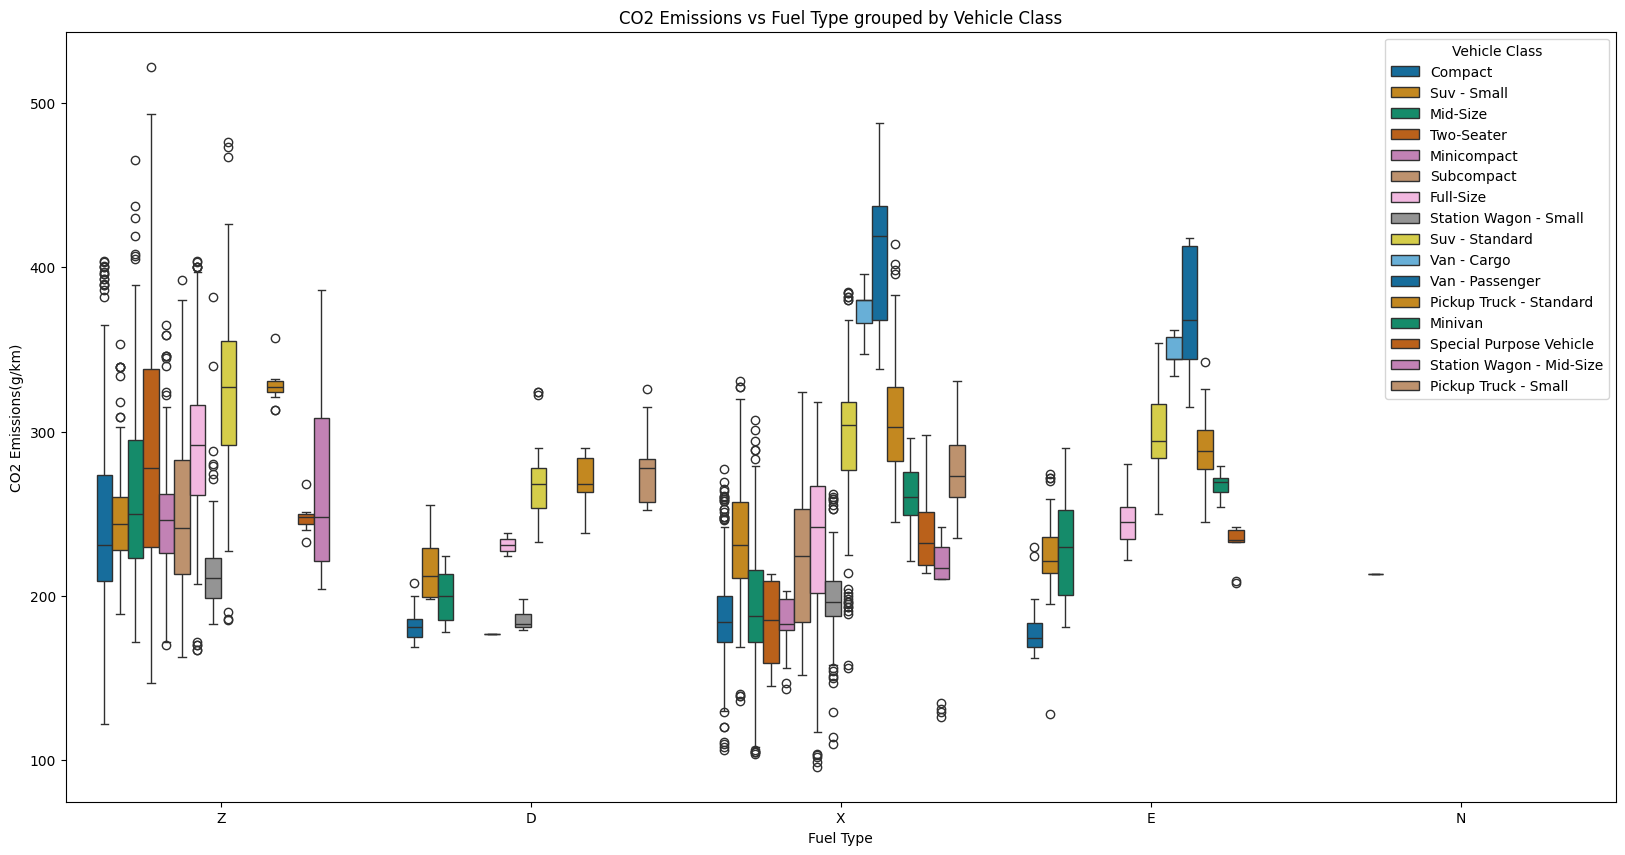

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', hue='Vehicle Class', data=df, palette='colorblind')
plt.title('CO2 Emissions vs Fuel Type grouped by Vehicle Class')
plt.show()

<Figure size 1800x1500 with 0 Axes>

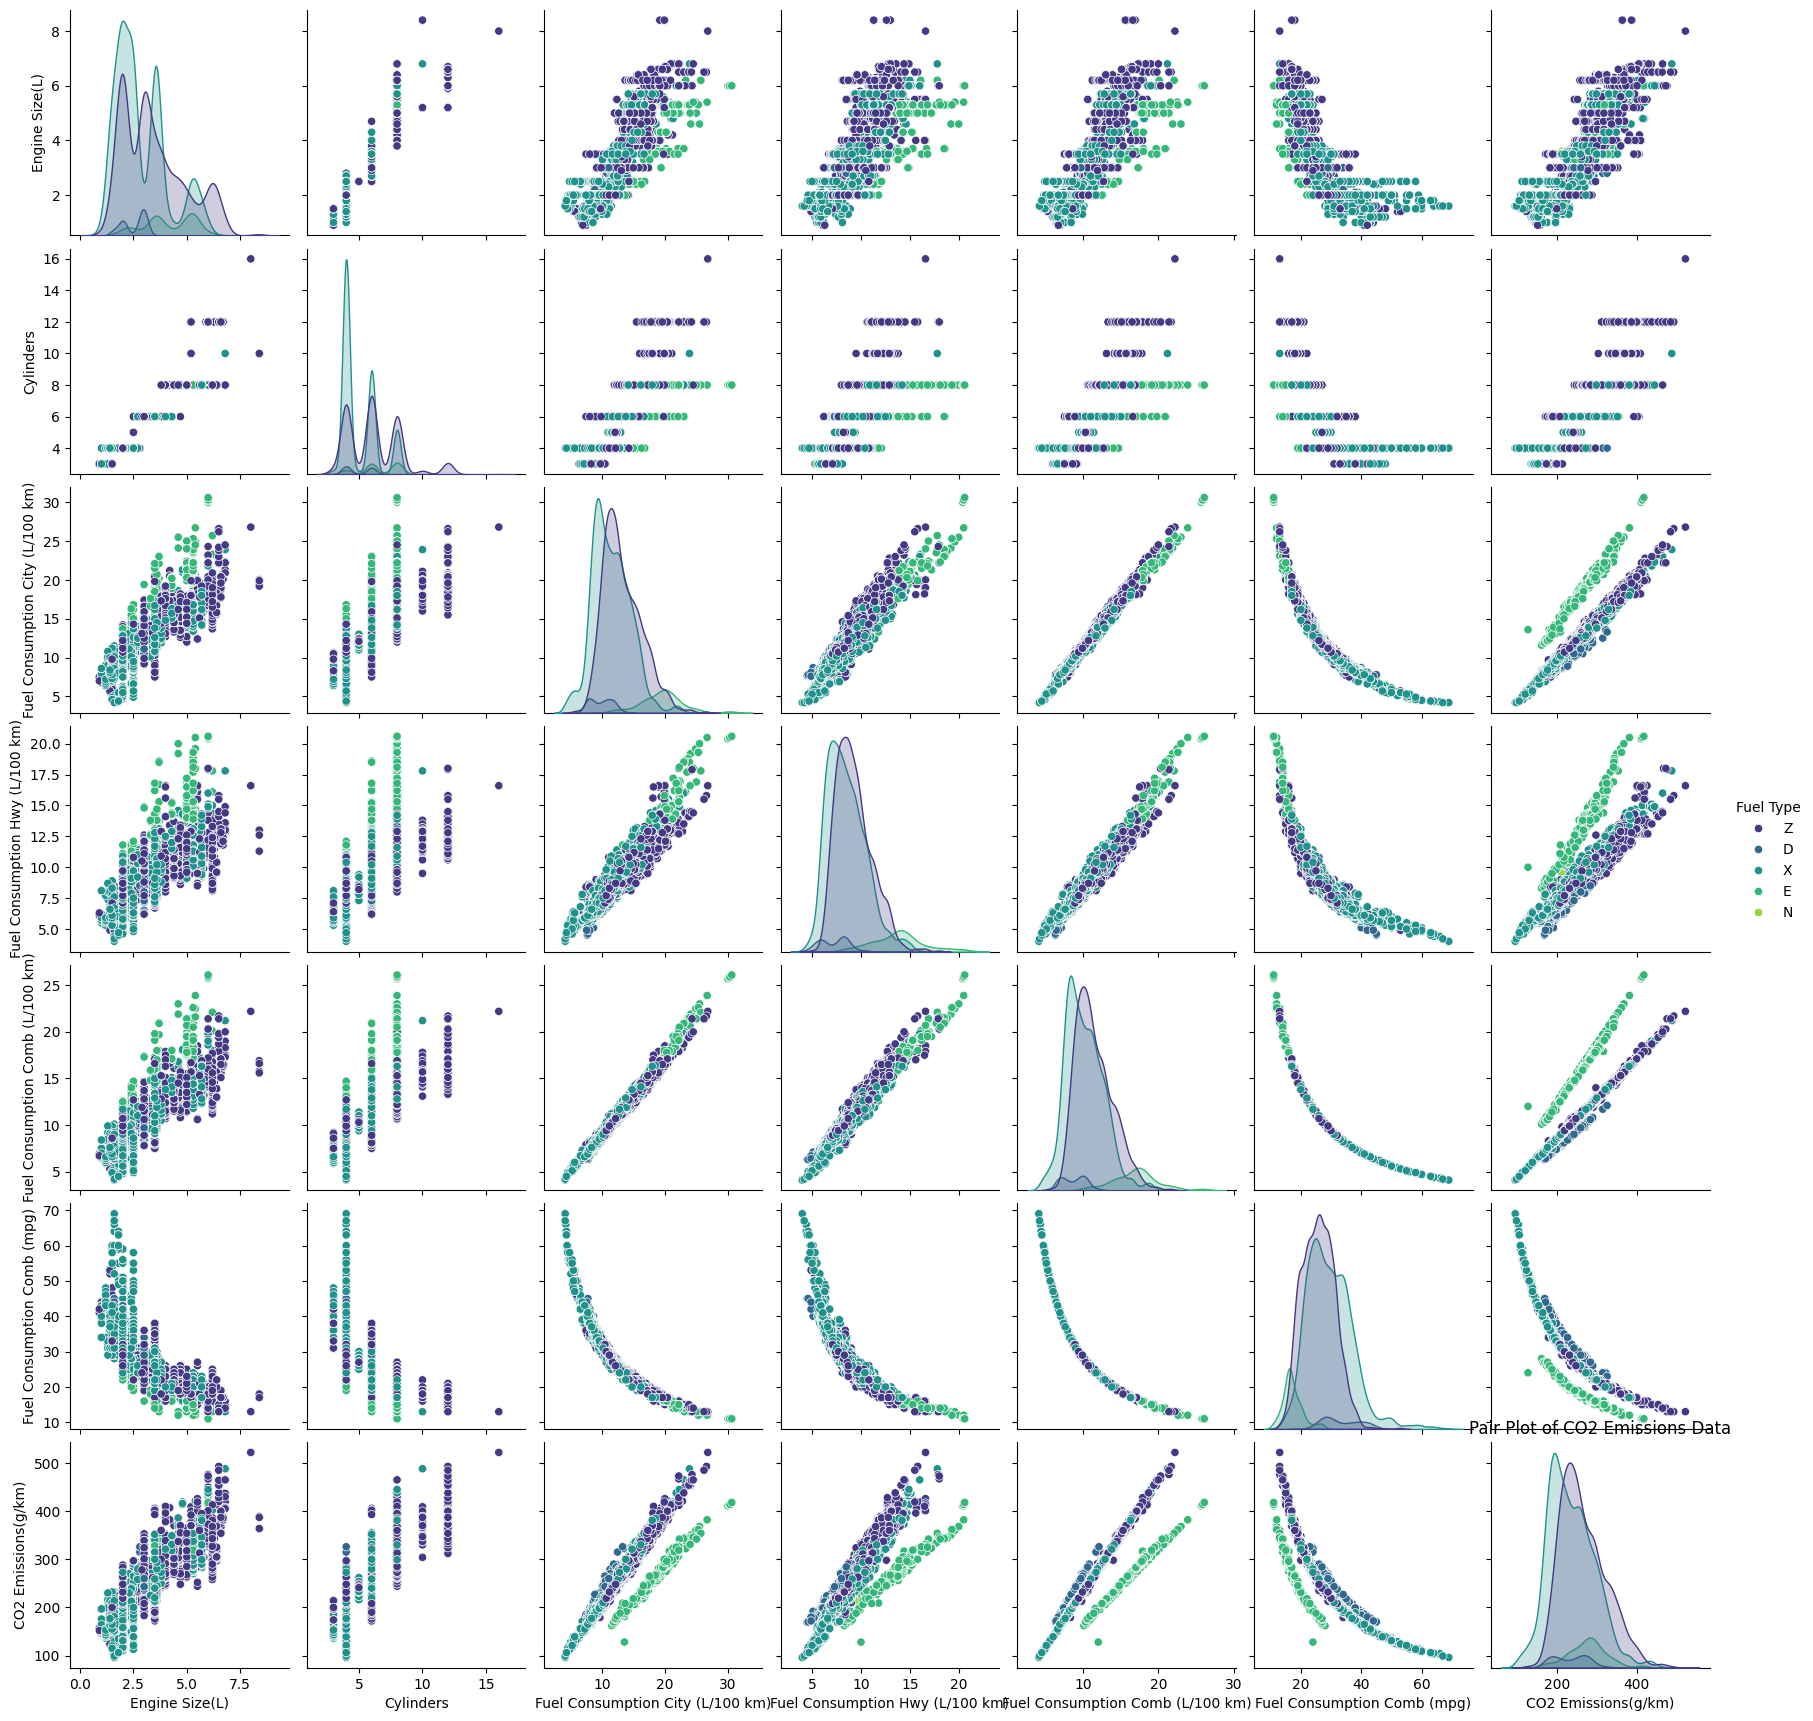

In [ ]:
# Pairplot to visualize relationships
plt.figure(figsize=(18, 15))
sns.pairplot(df, hue='Fuel Type', palette='viridis')
plt.title('Pair Plot of CO2 Emissions Data')
plt.show()

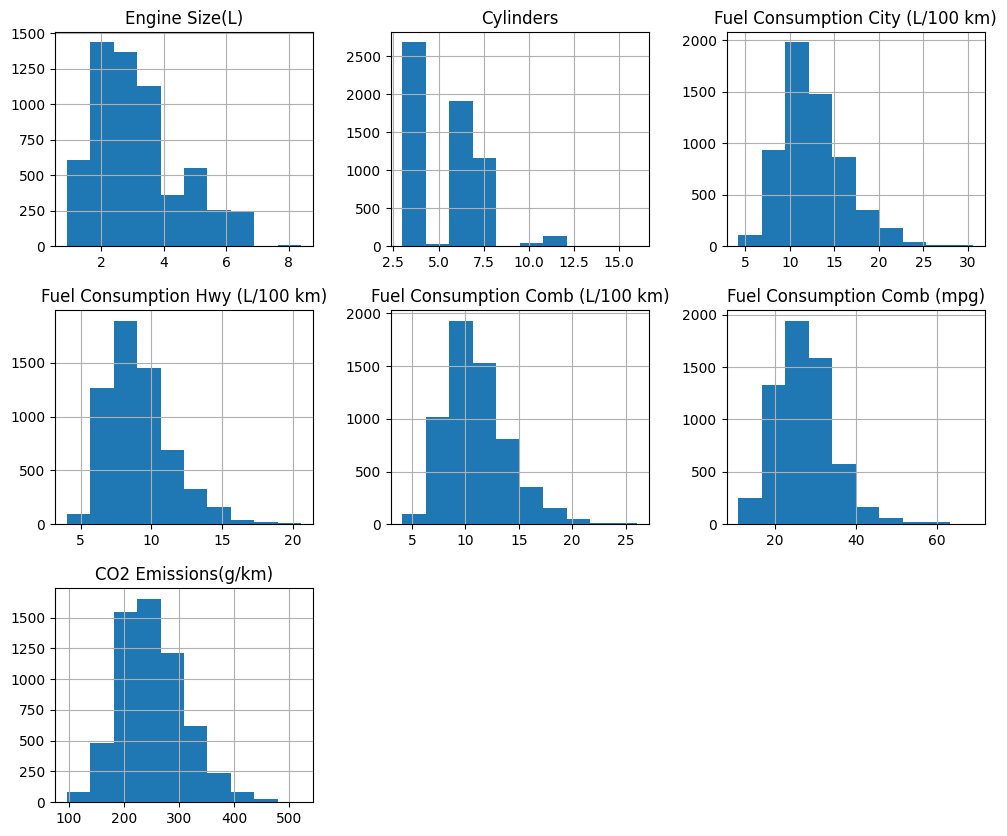

In [ ]:
#Histograms for all features
df.hist(figsize=(12, 10))
plt.show()

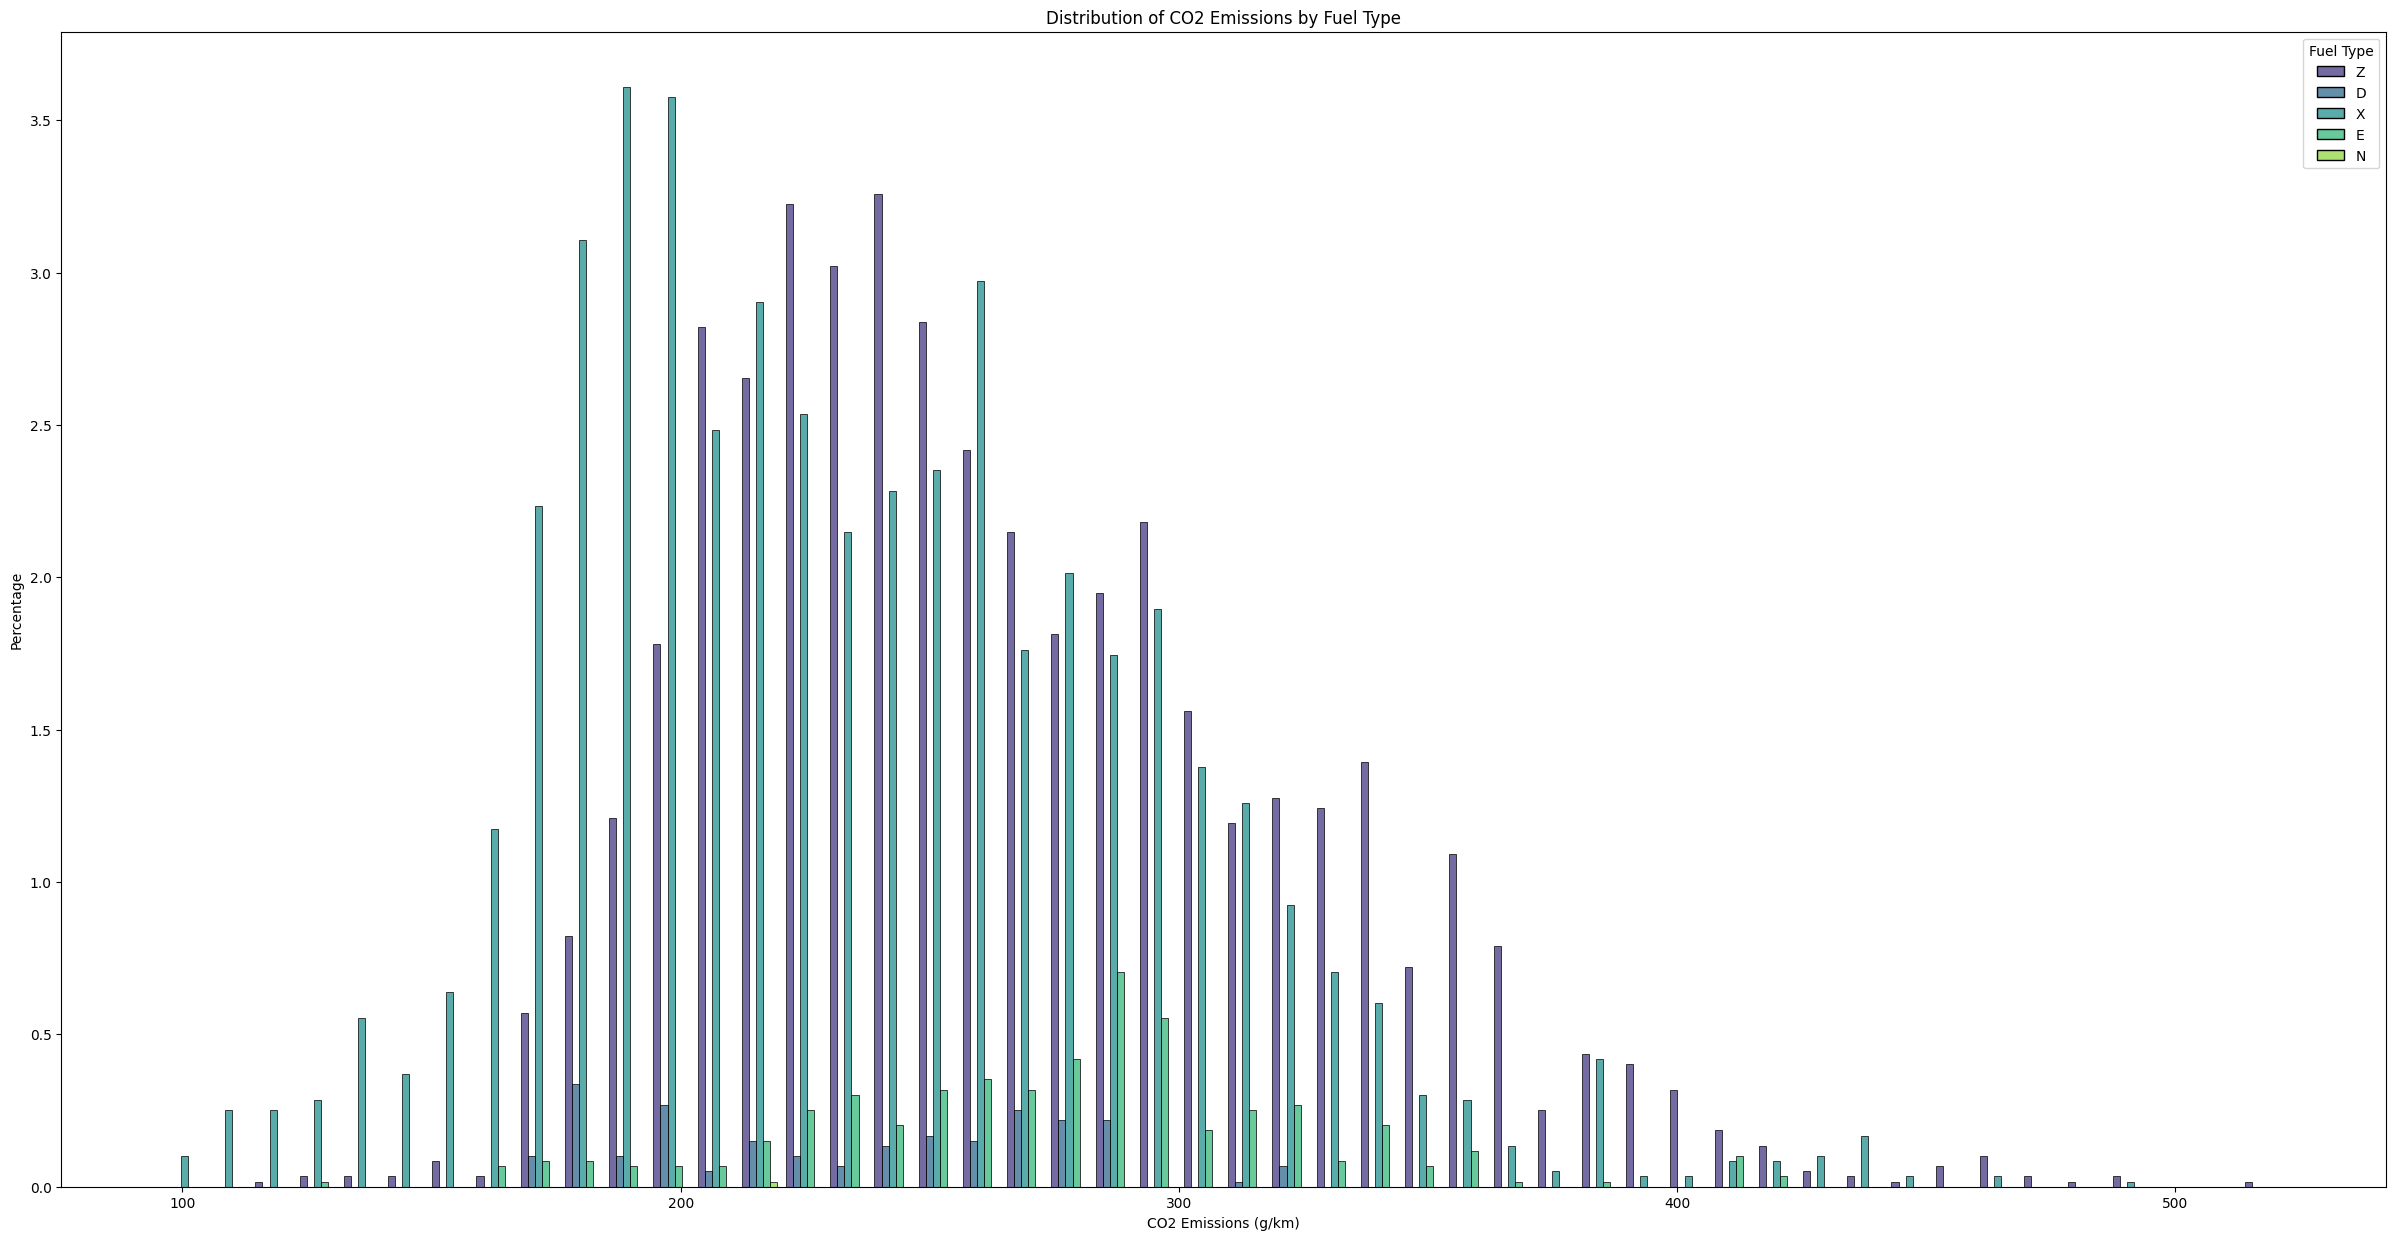

In [ ]:
plt.figure(figsize=(30, 15))
sns.histplot(data=df, x='CO2 Emissions(g/km)', hue='Fuel Type', palette='viridis', stat='percent', multiple="dodge", shrink=0.8)
plt.title('Distribution of CO2 Emissions by Fuel Type')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Percentage')
plt.show()

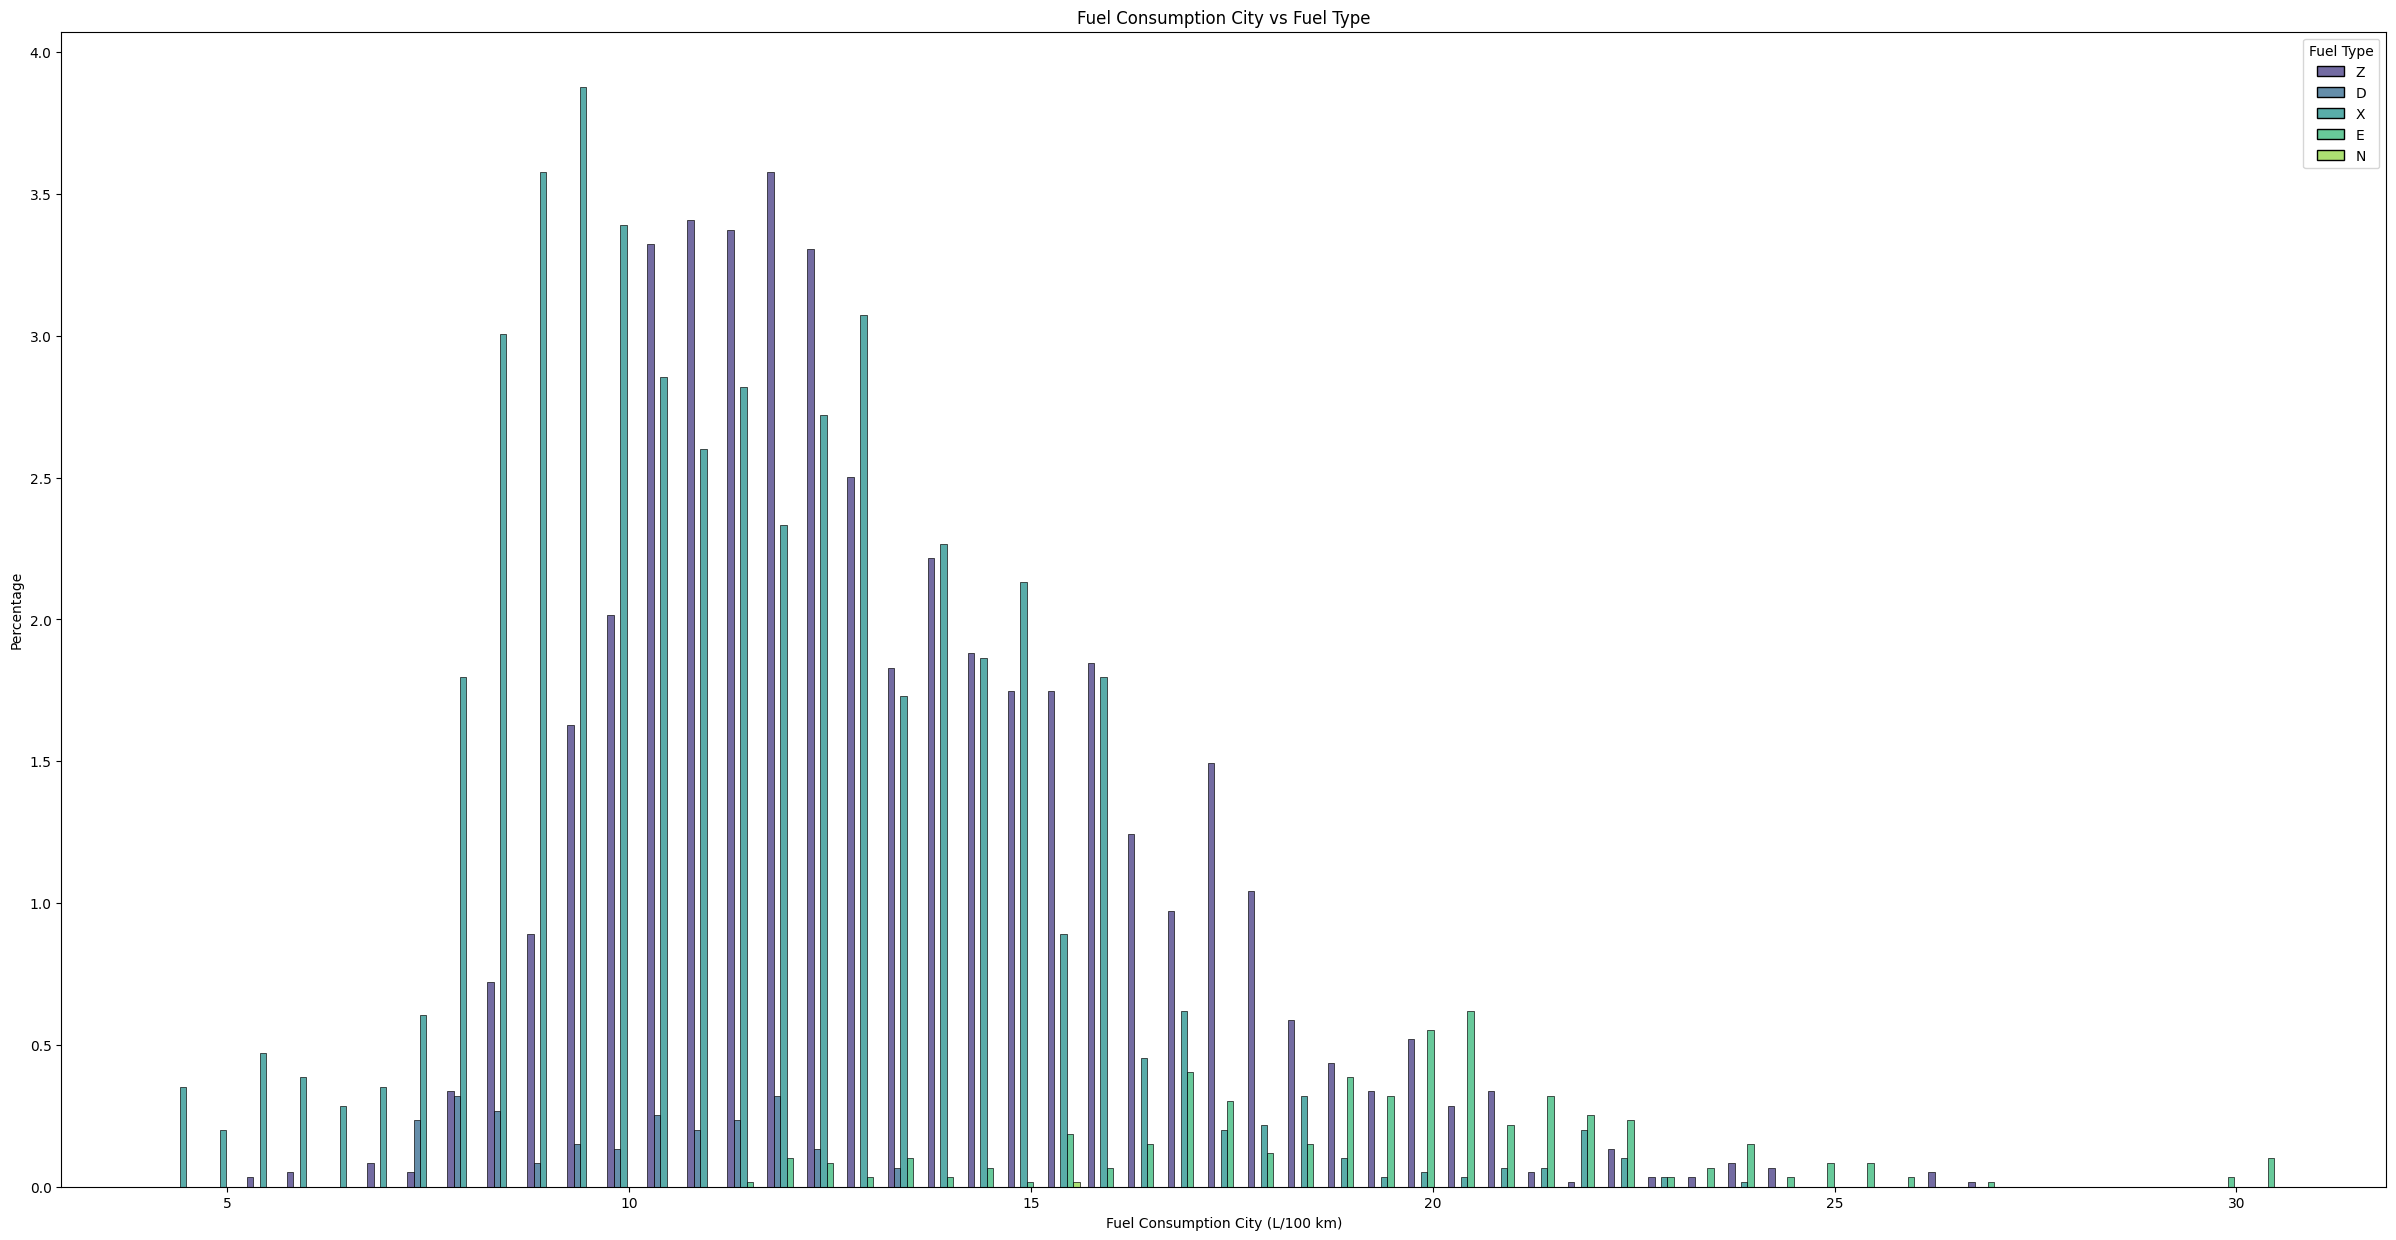

In [ ]:
plt.figure(figsize=(30, 15))
sns.histplot(data=df, x='Fuel Consumption City (L/100 km)', hue='Fuel Type', stat='percent', palette='viridis', multiple="dodge", shrink=0.8)
plt.title('Fuel Consumption City vs Fuel Type')
plt.xlabel('Fuel Consumption City (L/100 km)')
plt.ylabel('Percentage')
plt.show()

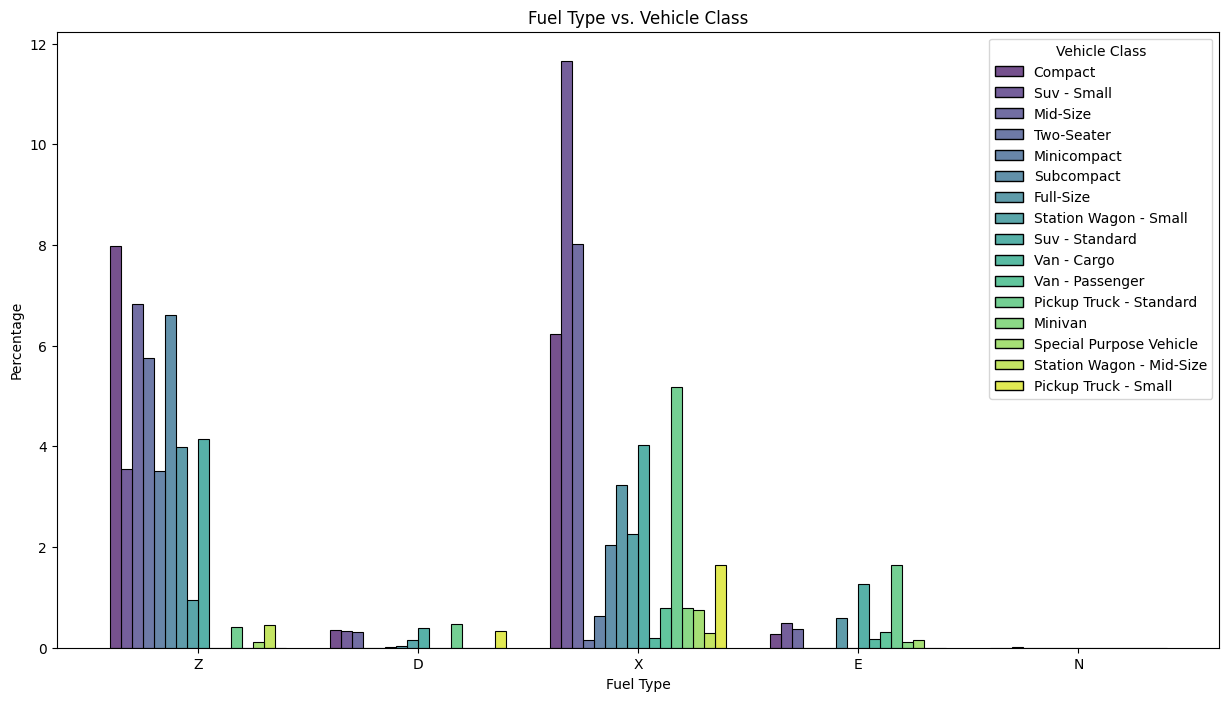

In [ ]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='Fuel Type', hue='Vehicle Class', stat='percent', multiple="dodge", palette='viridis', shrink=0.8)
plt.title('Fuel Type vs. Vehicle Class')
plt.xlabel('Fuel Type')
plt.ylabel('Percentage')
plt.show()

In [ ]:
categorical_features = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

numerical_features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                     'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                     'Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Ensure Target colunmn is numeric
df_encoded['CO2 Emissions(g/km)'] = df_encoded['CO2 Emissions(g/km)'].astype(int)

In [ ]:
#from scipy.special import expit #sigmoid function

# Assuming 'CO2 Emissions(g/km)' is your target variable
#X = df_encoded.drop(columns=['CO2 Emissions(g/km)']).values
#y = df_encoded['CO2 Emissions(g/km)'].values

# Convert to float
#X = X.astype(float)

# Add bias term
#X = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters
#theta = np.zeros(X.shape[1])
#alpha = 0.01  # Learning rate
#iterations = 1000

# Gradient Descent
#for _ in range(iterations):
    #predictions = expit(X.dot(theta))  # Sigmoid function
    #errors = predictions - y
    #theta -= (alpha / len(y)) * X.T.dot(errors)

#print("Trained Parameters:", theta)

# Build logistic regression from Scratch and Accuracy calculation.

In [ ]:
# Split dataset into features and target
X = df_encoded.drop(columns=['CO2 Emissions(g/km)']).values
y = df_encoded['CO2 Emissions(g/km)'].values

# Convert to float
X = X.astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression for classification
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.0772


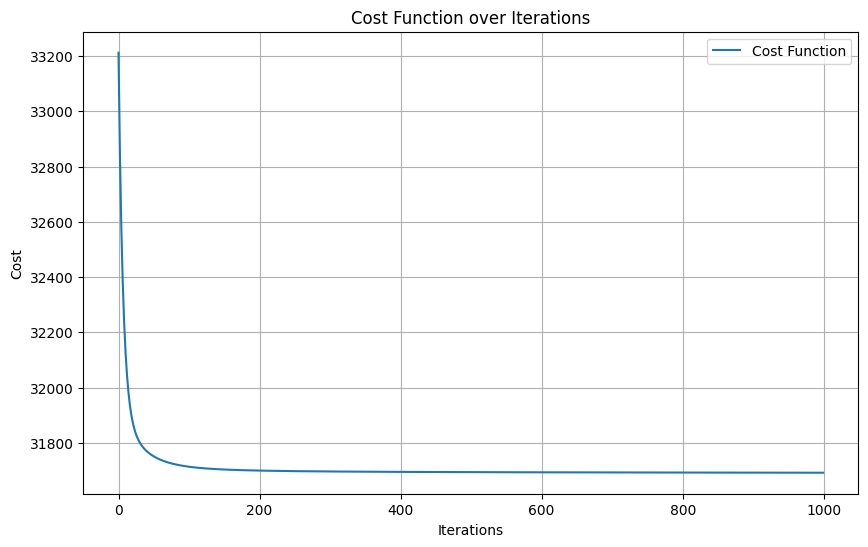

In [ ]:
# Plot the cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


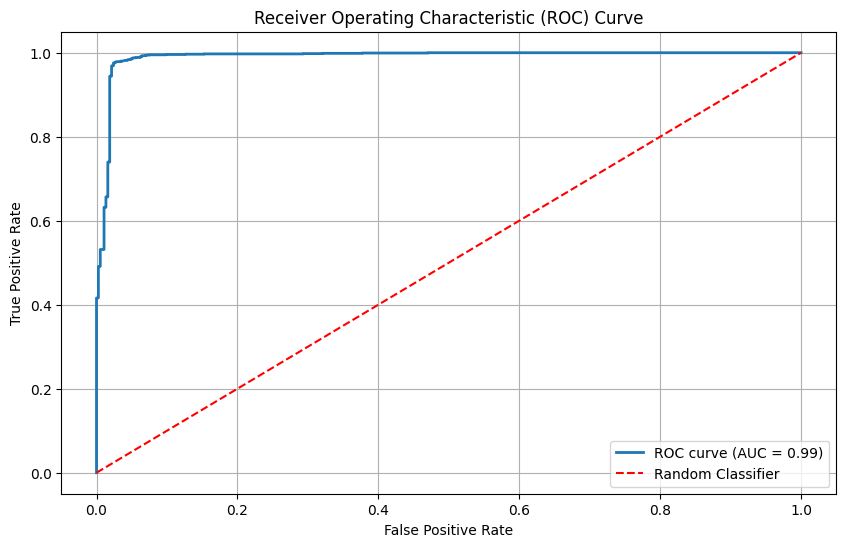

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, auc
# Create binary target 1 for "High Emissions" (CO2 > 200), 0 otherwise
df['High_Emissions'] = (df['CO2 Emissions(g/km)'] > 200).astype(int)

# Select features and target
features = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']
X = df[features]
y = df['High_Emissions']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_prob_test = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_test)
# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], color='r', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Build two Classification models(Use models)

In [ ]:
# Features
features = [ 'Engine Size(L)', 'Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)']
X = df[features]
y = df['High_Emissions']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for models like Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 1: Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

# Model 2: Random Forest Classifier
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

# Compare Performance
acc1 = accuracy_score(y_test, y_pred1)
acc2 = accuracy_score(y_test, y_pred2)

print(f"Model 1 (Logistic Regression) Accuracy: {acc1:.4f}")
print(f"Model 2 (Random Forest) Accuracy: {acc2:.4f}")

# Detailed Classification Reports
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred1))

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred2))

Model 1 (Logistic Regression) Accuracy: 0.9732
Model 2 (Random Forest) Accuracy: 0.9790

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       243
           1       0.99      0.98      0.98       949

    accuracy                           0.97      1192
   macro avg       0.95      0.96      0.96      1192
weighted avg       0.97      0.97      0.97      1192


Random Forest Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       243
           1       0.99      0.99      0.99       949

    accuracy                           0.98      1192
   macro avg       0.97      0.97      0.97      1192
weighted avg       0.98      0.98      0.98      1192



# Hyper-parameter

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# Perform Grid Search with Cross Validation
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for Logistic Regression:", grid_lr.best_params_)

# Best Model
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Optimized Logistic Regression Accuracy: {acc_lr:.4f}")


Best Parameters for Logistic Regression: {'C': 100, 'solver': 'liblinear'}
Optimized Logistic Regression Accuracy: 0.9740


In [ ]:
# Set parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],    # Number of trees
    'max_depth': [None, 10, 20],       # Maximum depth of trees
    'min_samples_split': [2, 5, 10]    # Minimum samples required to split a node
}

# Perform Grid Search with 5-fold cross-validation
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy'
)
grid_rf.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for Random Forest:", grid_rf.best_params_)

# Best Model
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Optimized Random Forest Accuracy: {acc_rf:.4f}")

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Optimized Random Forest Accuracy: 0.9765


In [ ]:
from sklearn.feature_selection import RFE


# Use Logistic Regression as the estimator for RFE
best_lr = LogisticRegression(max_iter=1000)

# Recursive Feature Elimination (RFE) with Logistic Regression
selector_lr = RFE(estimator=best_lr, n_features_to_select=5)
selector_lr.fit(X_train, y_train)

# Selected features
selected_features_lr = [feature for feature, selected in zip(features, selector_lr.support_) if selected]
print("Selected Features for Logistic Regression:", selected_features_lr)


Selected Features for Logistic Regression: ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']


In [ ]:
selector_rf = RFE(best_rf, n_features_to_select=5)
selector_rf.fit(X_train, y_train)

selected_features_rf = [feature for feature, selected in zip(df_encoded.columns[:-1], selector_rf.support_) if selected]
print("Selected Features for Random Forest:", selected_features_rf)


Selected Features for Random Forest: ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)']


Final Model Accuracy: 0.9765

Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       243
           1       0.99      0.98      0.99       949

    accuracy                           0.98      1192
   macro avg       0.96      0.97      0.96      1192
weighted avg       0.98      0.98      0.98      1192



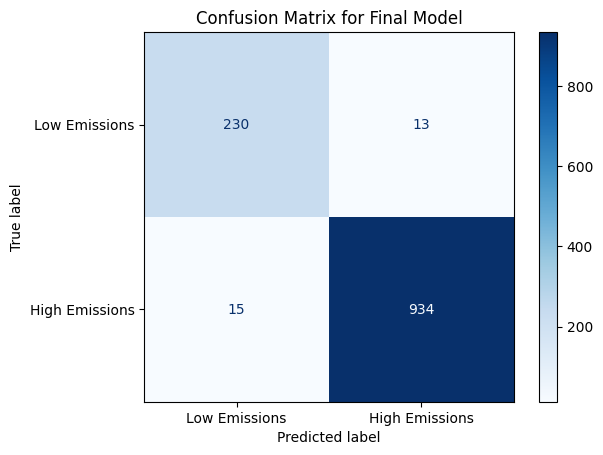

In [ ]:
# Filter dataset with selected features
X_train_final = X_train[:, selector_rf.support_]
X_test_final = X_test[:, selector_rf.support_]

# Retrain with best model (Example: Random Forest)
final_model = best_rf.fit(X_train_final, y_train)
y_pred_final = final_model.predict(X_test_final)


# Evaluate Final Model
acc_final = accuracy_score(y_test, y_pred_final)
print(f"Final Model Accuracy: {acc_final:.4f}")

print("\nFinal Model Classification Report:")
print(classification_report(y_test, y_pred_final))

#compute confusion matrix
cm = confusion_matrix(y_test, y_pred_final)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Emissions', 'High Emissions'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Final Model')
plt.show()